In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.express as px
import seaborn as sns
import gc
import time
from sklearn.metrics import roc_auc_score
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
start_time = time.time()
meta_data = pd.read_csv('/content/drive/MyDrive/Multimodal_Single_Cell analysis/metadata.csv', index_col=0)
end_time = time.time()
print(end_time - start_time)
meta_data.head()

1.1707065105438232


,day,donor,cell_type,technology
cell_id,,,,
c2150f55becb,2,27678,HSC,citeseq
65b7edf8a4da,2,27678,HSC,citeseq
c1b26cb1057b,2,27678,EryP,citeseq
917168fa6f83,2,27678,NeuP,citeseq
2b29feeca86d,2,27678,EryP,citeseq


In [ ]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 281528 entries, c2150f55becb to b847ba21f59f
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   day         281528 non-null  int64 
 1   donor       281528 non-null  int64 
 2   cell_type   281528 non-null  object
 3   technology  281528 non-null  object
dtypes: int64(2), object(2)
memory usage: 10.7+ MB


In [ ]:
start_time = time.time()
train = pd.read_hdf('/content/drive/MyDrive/Multimodal_Single_Cell analysis/train_cite_inputs.h5', stop=33500)
end_time = time.time()
print(end_time - start_time)

18.465648889541626


In [ ]:
train.head(25)

gene_id,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,ENSG00000128274_A4GALT,ENSG00000094914_AAAS,ENSG00000081760_AACS,ENSG00000109576_AADAT,ENSG00000103591_AAGAB,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
cell_id,,,,,,,,,,,,,,,,,,,,,
45006fe3e4c8,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.090185,0.000000
d02759a80ba2,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.039545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
c016c6b0efa5,0.0,0.000000,0.0,0.000000,0.0,3.847321,0.000000,3.847321,3.847321,0.000000,...,0.000000,0.000000,3.847321,4.529743,0.000000,0.000000,0.000000,3.847321,3.847321,0.000000
ba7f733a4f75,0.0,0.000000,0.0,0.000000,0.0,0.000000,3.436846,3.436846,0.000000,0.000000,...,3.436846,0.000000,4.113780,5.020215,0.000000,0.000000,0.000000,3.436846,4.113780,0.000000
fbcf2443ffb2,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,4.196826,0.000000,0.000000,...,0.000000,4.196826,4.196826,4.196826,0.000000,0.000000,3.518610,4.196826,3.518610,0.000000
d80d84ca8e89,0.0,0.000000,0.0,0.000000,0.0,0.000000,3.651999,0.000000,0.000000,3.651999,...,0.000000,0.000000,3.651999,4.332091,0.000000,0.000000,3.651999,0.000000,4.733167,0.000000
1ac2049b4c98,0.0,0.000000,0.0,0.000000,0.0,0.000000,4.048356,0.000000,0.000000,0.000000,...,0.000000,0.000000,4.048356,5.135265,0.000000,0.000000,0.000000,0.000000,4.732739,4.048356
33fb0c29e2e4,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,4.392134,0.000000,3.317969,...,0.000000,3.317969,0.000000,3.992837,0.000000,0.000000,0.000000,0.000000,3.992837,0.000000
b329261bd0ee,0.0,3.775647,0.0,0.000000,0.0,0.000000,3.775647,0.000000,0.000000,4.457267,...,0.000000,3.775647,0.000000,4.457267,0.000000,0.000000,0.000000,0.000000,4.457267,3.775647


In [ ]:
a = (train > 0).mean()

In [ ]:
a.iloc[:25]

gene_id
ENSG00000121410_A1BG        0.024269
ENSG00000268895_A1BG-AS1    0.053731
ENSG00000175899_A2M         0.003612
ENSG00000245105_A2M-AS1     0.035851
ENSG00000166535_A2ML1       0.000746
ENSG00000128274_A4GALT      0.030448
ENSG00000094914_AAAS        0.458746
ENSG00000081760_AACS        0.415164
ENSG00000109576_AADAT       0.082418
ENSG00000103591_AAGAB       0.344985
ENSG00000115977_AAK1        0.559522
ENSG00000087884_AAMDC       0.574090
ENSG00000127837_AAMP        0.690328
ENSG00000129673_AANAT       0.000448
ENSG00000131043_AAR2        0.262388
ENSG00000205002_AARD        0.007254
ENSG00000090861_AARS        0.533104
ENSG00000124608_AARS2       0.121194
ENSG00000266967_AARSD1      0.218149
ENSG00000157426_AASDH       0.390836
ENSG00000149313_AASDHPPT    0.742567
ENSG00000008311_AASS        0.056627
ENSG00000215458_AATBC       0.004985
ENSG00000275700_AATF        0.760746
ENSG00000181409_AATK        0.015851
dtype: float64

In [ ]:
a.value_counts()

0.000000    795
1.000000     93
0.000567     92
0.000597     90
0.000627     83
           ... 
0.258090      1
0.837970      1
0.515433      1
0.943433      1
0.236119      1
Length: 10928, dtype: int64

<Axes: >

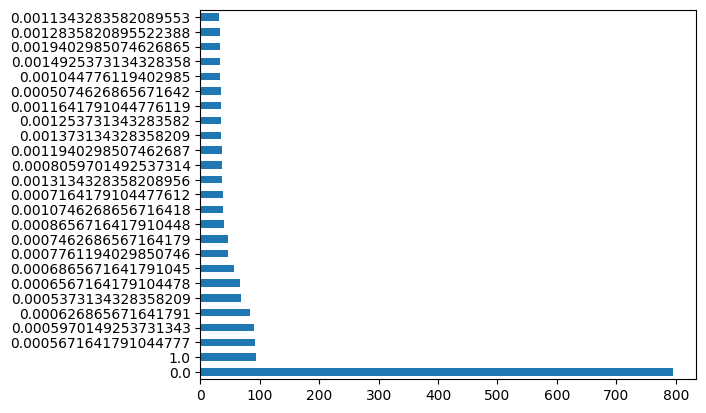

In [ ]:
a.value_counts().iloc[:25].plot(kind="barh")

In [ ]:
import pandas as pd

#threshold for sparsity as a percentage
threshold_percentage = 30

zero_percentage = ((33500 - train.astype(bool).sum()) / train.shape[0]) * 100

sparse_columns = zero_percentage[zero_percentage > threshold_percentage].index

train_without_sparse = train.drop(sparse_columns, axis=1)
train_without_sparse

gene_id,ENSG00000149313_AASDHPPT,ENSG00000275700_AATF,ENSG00000164163_ABCE1,ENSG00000204574_ABCF1,ENSG00000114779_ABHD14B,ENSG00000129968_ABHD17A,ENSG00000146386_ABRACL,ENSG00000265206_AC004687.1,ENSG00000244313_AC024293.1,ENSG00000242299_AC073861.1,...,ENSG00000142684_ZNF593,ENSG00000075292_ZNF638,ENSG00000122482_ZNF644,ENSG00000120963_ZNF706,ENSG00000106400_ZNHIT1,ENSG00000273611_ZNHIT3,ENSG00000066379_ZNRD1,ENSG00000186187_ZNRF1,ENSG00000132485_ZRANB2,ENSG00000122952_ZWINT
cell_id,,,,,,,,,,,,,,,,,,,,,
45006fe3e4c8,5.463848,4.774929,4.774929,5.177577,0.000000,4.774929,5.686144,4.774929,5.177577,4.090185,...,4.090185,4.090185,4.774929,6.272421,4.090185,4.774929,4.090185,0.000000,5.177577,0.000000
d02759a80ba2,0.000000,0.000000,4.723850,5.126350,4.723850,0.000000,7.018410,5.634798,5.126350,0.000000,...,4.039545,0.000000,0.000000,5.412547,5.126350,4.039545,4.039545,4.039545,5.412547,4.039545
c016c6b0efa5,4.931607,4.931607,3.847321,4.931607,5.217484,0.000000,3.847321,0.000000,3.847321,3.847321,...,0.000000,3.847321,0.000000,5.439542,3.847321,3.847321,5.217484,3.847321,5.439542,4.529743
ba7f733a4f75,4.798720,4.113780,5.020215,4.798720,3.436846,4.113780,5.487739,5.487739,5.020215,3.436846,...,4.798720,0.000000,4.113780,5.487739,5.354798,0.000000,4.113780,4.513782,6.239318,5.020215
fbcf2443ffb2,5.104050,4.196826,4.597264,4.597264,4.196826,3.518610,5.889190,0.000000,3.518610,4.882423,...,5.438786,3.518610,4.882423,5.794157,5.571774,0.000000,3.518610,5.104050,5.438786,4.196826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f658c1572294,4.461278,4.461278,4.862886,5.552162,4.461278,3.779612,5.552162,4.461278,5.148635,3.779612,...,3.779612,3.779612,0.000000,5.552162,5.370616,4.461278,5.370616,3.779612,4.862886,5.148635
40e06ce9f956,0.000000,0.000000,4.254277,0.000000,4.940297,0.000000,4.254277,6.187938,4.254277,4.940297,...,4.254277,0.000000,4.254277,4.940297,6.034130,4.254277,0.000000,6.543996,0.000000,0.000000
569cb2d9556f,4.138085,4.138085,0.000000,4.823224,5.734679,0.000000,4.138085,5.226006,4.823224,4.138085,...,4.138085,6.070227,4.823224,4.138085,5.916461,0.000000,4.823224,5.734679,5.512343,0.000000


In [ ]:
train = train_without_sparse

In [ ]:
train = pd.merge(meta_data, train, how='inner', on=['cell_id'])
train.head()

,day,donor,cell_type,technology,ENSG00000149313_AASDHPPT,ENSG00000275700_AATF,ENSG00000164163_ABCE1,ENSG00000204574_ABCF1,ENSG00000114779_ABHD14B,ENSG00000129968_ABHD17A,...,ENSG00000142684_ZNF593,ENSG00000075292_ZNF638,ENSG00000122482_ZNF644,ENSG00000120963_ZNF706,ENSG00000106400_ZNHIT1,ENSG00000273611_ZNHIT3,ENSG00000066379_ZNRD1,ENSG00000186187_ZNRF1,ENSG00000132485_ZRANB2,ENSG00000122952_ZWINT
cell_id,,,,,,,,,,,,,,,,,,,,,
45006fe3e4c8,2,32606,HSC,citeseq,5.463848,4.774929,4.774929,5.177577,0.000000,4.774929,...,4.090185,4.090185,4.774929,6.272421,4.090185,4.774929,4.090185,0.000000,5.177577,0.000000
d02759a80ba2,2,32606,HSC,citeseq,0.000000,0.000000,4.723850,5.126350,4.723850,0.000000,...,4.039545,0.000000,0.000000,5.412547,5.126350,4.039545,4.039545,4.039545,5.412547,4.039545
c016c6b0efa5,2,32606,EryP,citeseq,4.931607,4.931607,3.847321,4.931607,5.217484,0.000000,...,0.000000,3.847321,0.000000,5.439542,3.847321,3.847321,5.217484,3.847321,5.439542,4.529743
ba7f733a4f75,2,32606,NeuP,citeseq,4.798720,4.113780,5.020215,4.798720,3.436846,4.113780,...,4.798720,0.000000,4.113780,5.487739,5.354798,0.000000,4.113780,4.513782,6.239318,5.020215
fbcf2443ffb2,2,32606,EryP,citeseq,5.104050,4.196826,4.597264,4.597264,4.196826,3.518610,...,5.438786,3.518610,4.882423,5.794157,5.571774,0.000000,3.518610,5.104050,5.438786,4.196826


In [ ]:
columns_to_drop = ['day', 'donor', 'technology', 'cell_type']
X = train.drop(columns=columns_to_drop, axis=1)
X.head()

,ENSG00000149313_AASDHPPT,ENSG00000275700_AATF,ENSG00000164163_ABCE1,ENSG00000204574_ABCF1,ENSG00000114779_ABHD14B,ENSG00000129968_ABHD17A,ENSG00000146386_ABRACL,ENSG00000265206_AC004687.1,ENSG00000244313_AC024293.1,ENSG00000242299_AC073861.1,...,ENSG00000142684_ZNF593,ENSG00000075292_ZNF638,ENSG00000122482_ZNF644,ENSG00000120963_ZNF706,ENSG00000106400_ZNHIT1,ENSG00000273611_ZNHIT3,ENSG00000066379_ZNRD1,ENSG00000186187_ZNRF1,ENSG00000132485_ZRANB2,ENSG00000122952_ZWINT
cell_id,,,,,,,,,,,,,,,,,,,,,
45006fe3e4c8,5.463848,4.774929,4.774929,5.177577,0.000000,4.774929,5.686144,4.774929,5.177577,4.090185,...,4.090185,4.090185,4.774929,6.272421,4.090185,4.774929,4.090185,0.000000,5.177577,0.000000
d02759a80ba2,0.000000,0.000000,4.723850,5.126350,4.723850,0.000000,7.018410,5.634798,5.126350,0.000000,...,4.039545,0.000000,0.000000,5.412547,5.126350,4.039545,4.039545,4.039545,5.412547,4.039545
c016c6b0efa5,4.931607,4.931607,3.847321,4.931607,5.217484,0.000000,3.847321,0.000000,3.847321,3.847321,...,0.000000,3.847321,0.000000,5.439542,3.847321,3.847321,5.217484,3.847321,5.439542,4.529743
ba7f733a4f75,4.798720,4.113780,5.020215,4.798720,3.436846,4.113780,5.487739,5.487739,5.020215,3.436846,...,4.798720,0.000000,4.113780,5.487739,5.354798,0.000000,4.113780,4.513782,6.239318,5.020215
fbcf2443ffb2,5.104050,4.196826,4.597264,4.597264,4.196826,3.518610,5.889190,0.000000,3.518610,4.882423,...,5.438786,3.518610,4.882423,5.794157,5.571774,0.000000,3.518610,5.104050,5.438786,4.196826


In [ ]:
y = pd.DataFrame()
y["cell_type"] = train["cell_type"]
y.head()

,cell_type
cell_id,
45006fe3e4c8,HSC
d02759a80ba2,HSC
c016c6b0efa5,EryP
ba7f733a4f75,NeuP
fbcf2443ffb2,EryP


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, random_state=0)

###Data Preprcessing

In [ ]:
scaler = StandardScaler()
pca = PCA()
normalized_data = scaler.fit_transform(X)

In [ ]:
def pca_retain(X, variance_retained, pca):
    pca_df = pca.fit_transform(normalized_data)
    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    num_components = np.argmax(cumulative_variance_ratio >= variance_retained) + 1
    return (pca_df, num_components)

In [ ]:
def perform_pca_test(data, variance_retained, pca):
    normalized_data = scaler.transform(X)
    pca_df = pca.transform(normalized_data)
    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    num_components = np.argmax(cumulative_variance_ratio >= variance_retained) + 1
    return (pca_df, num_components)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, random_state=0)

In [ ]:
p = pca_retain(X_train, 0.95, pca)

In [ ]:
p

(array([[ 3.1218452e+00, -1.3034225e+01,  2.9393477e+00, ...,
          1.4678966e-01, -4.0902384e-02,  2.9516604e-02],
        [ 5.5196805e+00, -1.6452810e+01,  3.2314544e+00, ...,
          1.1724533e-01, -1.8190086e-01, -6.8598494e-02],
        [ 4.4242854e+00,  2.3039086e+00, -2.0800366e+00, ...,
         -1.2879342e-01, -3.6531529e-01, -9.4307270e-03],
        ...,
        [ 3.6967655e+01,  4.2411089e+00, -7.8526440e+00, ...,
          4.6468851e-01,  6.7359344e-03, -1.1780926e-02],
        [-1.2824512e+01, -5.9184475e+00,  1.5600326e+00, ...,
          2.3346366e-01, -6.6628397e-02, -5.8788609e-02],
        [-6.4823308e+00,  3.4117901e+00, -7.2221785e+00, ...,
         -2.0242453e-01,  7.2404861e-02, -5.0894663e-02]], dtype=float32),
 2051)

### PCA

In [ ]:
def label_processing(y):
  le = LabelEncoder()
  y = le.fit_transform(y.iloc[:,0])
  y = pd.DataFrame(y)
  return y.values.ravel()

In [ ]:
scaler = StandardScaler()
pca = PCA(n_components=p[1])

In [ ]:
def perform_pca(data, pca):
    normalized_data = scaler.fit_transform(data)
    pca_data = pca.fit_transform(normalized_data)
    pca_df = pd.DataFrame(pca_data, columns=["PC{}".format(i+1) for i in range(p[1])])
    return pca_df

In [ ]:
def perform_pca_test(data, pca):
    normalized_data = scaler.transform(data)
    pca_data = pca.transform(normalized_data)
    pca_df = pd.DataFrame(pca_data, columns=["PC{}".format(i+1) for i in range(p[1])])
    return pca_df

In [ ]:
start_time = time.time()
X_train_pca = perform_pca(X_train, pca)
end_time = time.time()
print("Time taken:", end_time-start_time)

Time taken: 11.054418325424194


In [ ]:
start_time = time.time()
X_test_pca = perform_pca_test(X_test, pca)
end_time = time.time()
print("Time taken:", end_time-start_time)

Time taken: 0.8653848171234131


In [ ]:
y_train = label_processing(y_train)
y_test = label_processing(y_test)

In [ ]:
pd.DataFrame(y_train).value_counts()

2    8643
1    3965
6    3529
3    2368
4    1432
5     114
0      49
dtype: int64

### PCA Visualization

<Axes: xlabel='PC1', ylabel='PC2'>

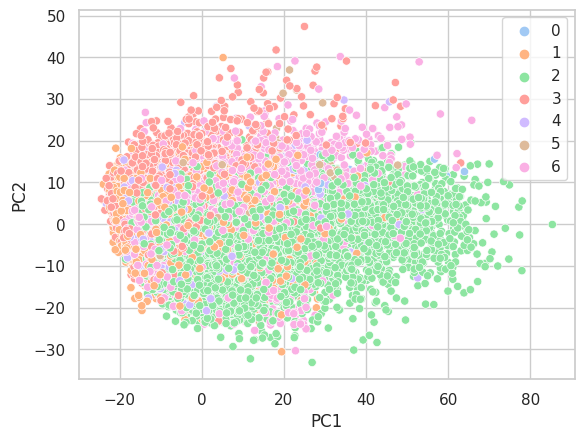

In [ ]:
sns.set(style="whitegrid")
fig, ax = plt.subplots()
sns.scatterplot(data=X_train_pca, x="PC1", y="PC2", hue=y_train, palette="pastel")

In [ ]:
fig = px.scatter_3d(X_train_pca, x="PC1", y="PC2", z="PC3", color=y_train, color_continuous_scale='GnBu')
fig.show()

### Model

XGBClassifier Batch Training

In [ ]:
X_train_pca.shape

(20100, 2051)

In [ ]:
X_train_pca_n = np.array(X_train_pca)
X_test_pca_n = np.array(X_test_pca)

In [ ]:
X_train_pca_n

array([[ 1.1284889e+01,  6.0931435e+00, -4.1872844e-01, ...,
        -1.1106352e+00, -8.9694226e-01,  8.6808467e-01],
       [-1.6372078e+01,  3.9012487e+00, -2.0264201e-01, ...,
        -4.0137625e-01,  4.8448619e-01, -5.5152465e-02],
       [-1.1613650e+01, -7.1928234e+00, -3.1006536e+00, ...,
         1.6755691e-01,  8.6634892e-01,  3.2439503e-01],
       ...,
       [ 9.5693207e+00, -1.0292382e+01, -3.0205953e+00, ...,
        -1.4851098e-02, -1.5754794e+00, -4.8788419e-01],
       [-4.9188399e+00,  2.8965504e+00,  1.7933762e+00, ...,
        -2.5298575e-01, -2.0814624e-01,  4.3717417e-01],
       [ 5.1819019e+00,  3.9931942e+01,  1.3188971e+01, ...,
        -4.0779406e-01,  5.3573745e-01, -9.5861357e-01]], dtype=float32)

In [ ]:
y_train

array([6, 3, 2, ..., 2, 1, 1])

In [ ]:
y_test

array([6, 6, 1, ..., 2, 2, 3])

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error

In [ ]:
size = len(X_train_pca_n)
print("Size of X_train_pca:", size)
for i in range(1, size):
  if (size % i) == 0:
    print(f'{i}', end=' ')

Size of X_train_pca: 20100
1 2 3 4 5 6 10 12 15 20 25 30 50 60 67 75 100 134 150 201 268 300 335 402 670 804 1005 1340 1675 2010 3350 4020 5025 6700 10050 

In [ ]:
batch_size = 3350
col_size = 2051
X_train_batched, y_train_batched = X_train_pca_n.reshape(-1,batch_size,col_size), y_train.reshape(-1,batch_size)

In [ ]:
start_time = time.time()
total_rmse=0
for i, (X_batch, y_batch) in enumerate(zip(X_train_batched, y_train_batched)):
    print(f'Step: {i}',end = ' ')
    if i == 0:
        model_xgbc.fit(X_batch, y_batch, verbose=False)
    else:
        model_xgbc.fit(X_batch, y_batch, verbose=False, xgb_model = model_xgbc)
    preds = model_xgbc.predict(X_test_pca_n)
    rmse = mean_squared_error(y_test, preds,squared=False)
    total_rmse+=rmse
end_time = time.time()
print("Time Taken:", end_time - start_time)

Step: 0 Step: 1 Step: 2 Step: 3 Step: 4 Step: 5 Time Taken: 609.8019227981567


In [ ]:
print(rmse)
print(total_rmse/5)

1.0383324748644862
1.221722476513302


In [ ]:
y_pred = model_xgbc.predict(X_test_pca_n)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8645522388059701
